In [1]:
import pypan.ui as pan
from pypan.utils import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pyultc_setup = lambda: {'TW': 30.}

def pyultc_eval(n, V, I, time, **kwargs):
    TW = kwargs['TW']
    Vmag = 
    r = 1
    f = np.array([V[0] - r * I[0], V[1] - r * I[1], V[2] - r * I[2]])
    C = np.eye(3)
    R = -r * np.eye(3)
    return f, C, R

### Load the netlist

In [3]:
netlist_file = 'nordic.pan'
ok,libs = pan.load_netlist(netlist_file)
if not ok:
    print('load_netlist failed.')

### Run a DC analysis

In [4]:
pan.DC('Dc', nettype=1, sparse=2, gminstepping='no', ggroundstepping='no')

### Run a poles-zeros analysis

In [5]:
data = pan.PZ('Pz', mem_vars=['poles'], nettype=1, shift=0.3276152)
poles = data[0] / (2 * np.pi)
max_pole = np.real(poles).max()
print('Max real pole: {:g} Hz'.format(max_pole))

Max real pole: 0.199074 Hz


Make sure that the results read from memory are the same printed on screen:

### Run a first transient analysis lasting 100 seconds

In [6]:
tstop = 100
mem_vars = ['time', 'omega1', 'tap1', 'tap1py']
options = {'devvars': 1, 'nettype': 1, 'annotate': 5, 'saman': 1, \
        'tinc': 1.5, 'ireltol': 1e-3, 'iabstol': 1e-6, 'vreltol': 1e-3, \
        'sparse': 2, 'acntrl': 3, 'ltefactor': 1, 'method': 2, 'maxord': 2, \
        'savelist': '["[Oo]mega","tap"]'}
data = pan.tran('Tr1', tstop, mem_vars, libs, **options)
time     = data[0]
omega_G1 = data[1]
tap1     = data[2]
tap1py   = data[3]

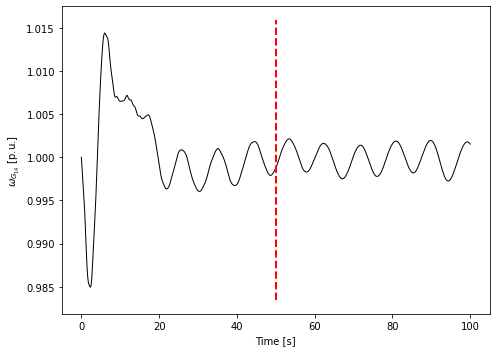

In [7]:
fig,ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(time, omega_G1, 'k', linewidth=1)
ax.plot([50,50], ax.get_ylim(), 'r--', lw=2)
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$\omega_{G_{14}}$ [p.u.]')
fig.tight_layout()

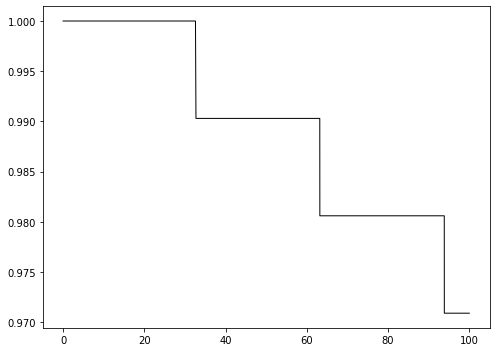

In [8]:
fig,ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(time, tap1, 'k', linewidth=1)
fig.tight_layout()

### Open a line

### Run a second transient analysis until 150 seconds

#### Plot the results